# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '221108'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y=element_line()))

In [4]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Age+Sex" = colors_dict$pastel$red$mid,
    "Retina" = colors_dict$pastel$red$mid,
    "Age+Sex+Retina" = colors_dict$pastel$red$mid,
    'MultiTaskSurvivalTraining_None_InceptionResnetV2+MLP_Identity' = colors_dict$pastel$red$mid
    #"Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [5]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)
endpoints_md = fread(glue("{experiment_path}/endpoints.csv"), colClasses=c("phecode"="character"))
endpoints = sort(endpoints_md$endpoint)

In [6]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [7]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_404", # Ischemic heart disease
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure
    "OMOP_4306655", # All-Cause Death
    # also generally important and relevant
    "phecode_440-3", # Pulmonary embolism
    "phecode_468", # Pneumonia
    "phecode_059-1", # COVID 19
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
    "phecode_542", # Chronic liver disease and sequelae
    "phecode_583", # Chronic kidney disease
    "phecode_328", # Dementias and cerebral degeneration
    # generally important and fun to check
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_665", # Psoriasis
    "phecode_705-1", # Rheumatoid arthritis
    # important for eye
    "phecode_371", # Cataract
    "phecode_374-3", # Retinal vascular changes and occlusions
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    "phecode_388" # Blindness and low vision
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )

endpoints_cardio = c(
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
     'OMOP_4306655', #  "All-Cause Death", # intervention
    'phecode_420', #  "Cardiac arrest", # intervention
    "phecode_059-1" # COVID 19
   
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [8]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

## Load data

# Load Benchmarks

In [9]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '221109'
name = glue("benchmarks_cvd_cindex_{today}")
benchmark_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather")) %>% left_join(endpoints_md) 

Joining, by = "endpoint"


In [10]:
benchmark_endpoints %>% group_by(endpoint, score) %>% summarise(cindex=mean(cindex)) %>% group_by(score) %>% summarise(mean(cindex)) %>% arrange(`mean(cindex)`)

`summarise()` has grouped output by 'endpoint'. You can override using the
`.groups` argument.


score,mean(cindex)
<chr>,<dbl>
Age+Sex,0.6608520
Retina,0.6769449
Age+Sex+Retina,0.6900333
SCORE2,0.7092287
SCORE2+Retina,0.7206295
ASCVD,0.7282584
ASCVD+Retina,0.7299155
QRISK3+Retina,0.7399944
QRISK3,0.7404582


In [11]:
benchmark_endpoints %>% group_by(endpoint) %>% filter(endpoint =='phecode_059-1')

endpoint,score,model,iteration,time,cindex,V1,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
phecode_059-1,Age+Sex,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.4652638,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.5281674,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,Age+Sex+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.5556135,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,SCORE2,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.5849007,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,SCORE2+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.5935568,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,ASCVD,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.6177149,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,ASCVD+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.5948151,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,QRISK3,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.6164851,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1
phecode_059-1,QRISK3+Retina,ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio0.66,1,10,0.5900610,22,61256,1017,0.01660246,059.1,COVID-19*,ID,Both,1,59,1


In [12]:
endpoints_sorted = (benchmark_endpoints %>% 
    filter(score == "Age+Sex+Retina") %>% 
    group_by(endpoint, score) %>% 
    summarise(cindex=mean(cindex, na.rm=TRUE)) %>% 
    arrange(cindex) %>% ungroup())$endpoint

`summarise()` has grouped output by 'endpoint'. You can override using the
`.groups` argument.


In [13]:
categories_sorted = (endpoint_defs %>% distinct(phecode_category))$phecode_category

benchmark_endpoints## General Performance

In [14]:
library(ggdist)

Warning message:
“package ‘ggdist’ was built under R version 4.0.5”


In [15]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

## Performance against CVD Scores

In [16]:
plot_width = 8.25; plot_height=2; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

plot_against_score = function(score1, score2, endpoint_order=c()){
    
    scores_plot = c(score1, score2)#, "AgeSexRetina"
    
    score_label = glue("{score1} vs. {score2}")
    #print(score_label)

    temp = benchmark_endpoints %>% 
        filter(score %in% scores_plot) %>% 
        mutate(score = factor(score, levels=scores_plot)) %>%
        mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
        group_by(endpoint, score, phecode_string, phecode_category) %>%
        ungroup() %>%
        pivot_wider(names_from=score, values_from=cindex) %>% 
        mutate(id = row_number()) %>%
        mutate(delta = !!sym(score2)-!!sym(score1)) %>%
        mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
        mutate(endpoint = fct_reorder(endpoint, delta)) %>%
        mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
        mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
        filter(endpoint %in% endpoint_selection) #%>% mutate(endpoint=factor(endpoint, levels=endpoint_order_diff))
    
    temp_abs = temp %>% group_by(endpoint) %>% summarise(delta=median(delta), m_score2=median(!!sym(score2)), m_score1=median(!!sym(score1))) %>% ungroup() 
    #print(levels(temp_abs$endpoint))
    
    temp_abs_segment = temp_abs %>% rowwise() %>% mutate(min_cindex = min(m_score1, m_score2), max_cindex=max(m_score1, m_score2)) %>% ungroup()# %>% filter(abs(min_cindex-max_cindex)>0.02) 
    
    if (length(endpoint_order)>0){
        temp = temp %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        temp_abs = temp_abs %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        temp_abs_segment = temp_abs_segment %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        }
    #print(temp_abs_segment)
    
    abs = ggplot(temp_abs) + 
        #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
        labs(y="Concordance Index", title=score_label)+

        #geom_segment(data=temp_abs_segment, mapping=aes(x=endpoint, xend=endpoint, y=min_cindex+0.01, yend=max_cindex-0.01), alpha=0.4)+#, arrow = arrow(length = unit(0.01, "npc")), arrow.fill="black")+#+
        geom_segment(aes(x=fct_rev(endpoint), xend=fct_rev(endpoint), y=m_score1+0.01, yend=m_score2-0.01), alpha=0.4, arrow = arrow(length = unit(0.01, "npc")), arrow.fill="black")+#,
    
        geom_point(aes(x=fct_rev(endpoint), y=m_score1), size=1, color="black", alpha=0.7)+
        #geom_point(aes(x=fct_rev(endpoint), y=m_asm), size=1, color="#023768", alpha=0.7)+
        geom_point(aes(x=fct_rev(endpoint), y=m_score2), size=1.5, color="firebrick", alpha=0.7)+

        scale_x_discrete(labels=endpoint_map) +

        coord_flip(ylim=c(0.5, 0.9))+
         theme(strip.text = element_text(angle=270), axis.title.y=element_blank()) + 
        theme(legend.position="none")

        #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
    #geom_violin(size=0.1)
    rel = ggplot(temp) + 
        #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
        labs(y="Difference in Concordance Index")+
        geom_hline(yintercept=0, size=0.25, alpha=0.5, linetype="22") + 
        stat_pointinterval(aes(x=fct_rev(endpoint), y=delta), size=0.5)+

        theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),
           axis.ticks.y=element_blank()) + 
        coord_flip(ylim=c(-0.1, 0.23))+
         theme(strip.text = element_text(angle=270)) + 
        theme(legend.position="none")

        #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
    #geom_violin(size=0.1) 
    return(abs|rel)
    }

In [17]:
library(ggdist)

In [18]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [19]:
endpoint_order=c()
length(endpoint_order)

[1] 0

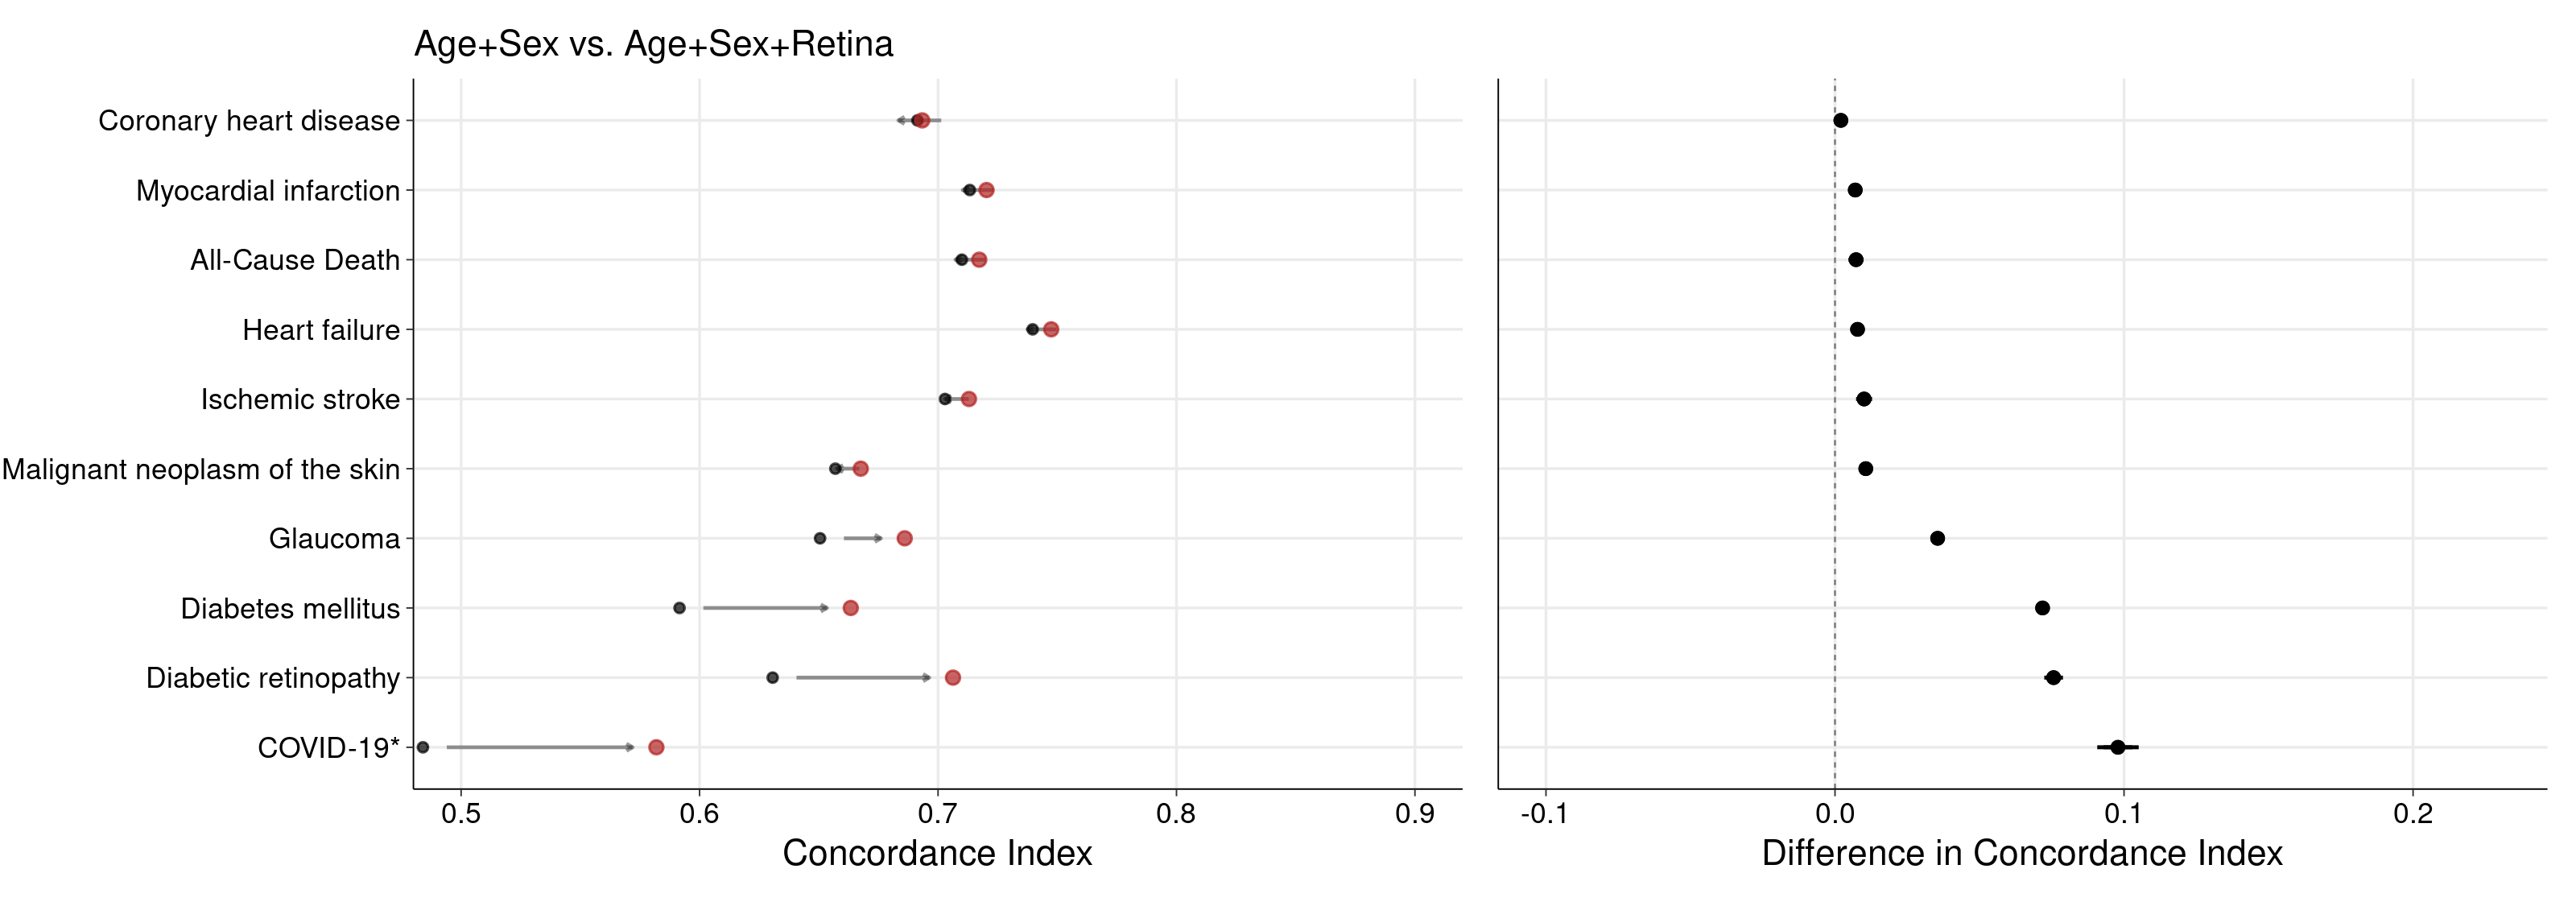

In [20]:
plot_width = 10; plot_height=3.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig1 = plot_against_score("Age+Sex", "Age+Sex+Retina")  
fig1

In [21]:
endpoints_cardio = c(
#     'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
#     'phecode_404', #  "Ischemic heart disease",
#     'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
#     'phecode_424', #  "Heart failure", # intervention
#      'OMOP_4306655', #  "All-Cause Death", # intervention
#     'phecode_420', #  "Cardiac arrest", # intervention
#     'phecode_059-1' # COVID
   
# )


    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
    'OMOP_4306655', #  "All-Cause Death", # intervention
#     'phecode_420' #  "Cardiac arrest", # intervention 
#     "phecode_375-1", # Glaucoma
#     "phecode_374-42", # Diabetic retinopathy
#     "phecode_202", # Diabetes mellitus
#     "phecode_401",	#Hypertension"  
#     "phecode_103", # Malignant neoplasm of the skin
    'phecode_059-1' #  "COVID",
    )

In [22]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)

Warning message:
“package ‘ggtext’ was built under R version 4.0.3”


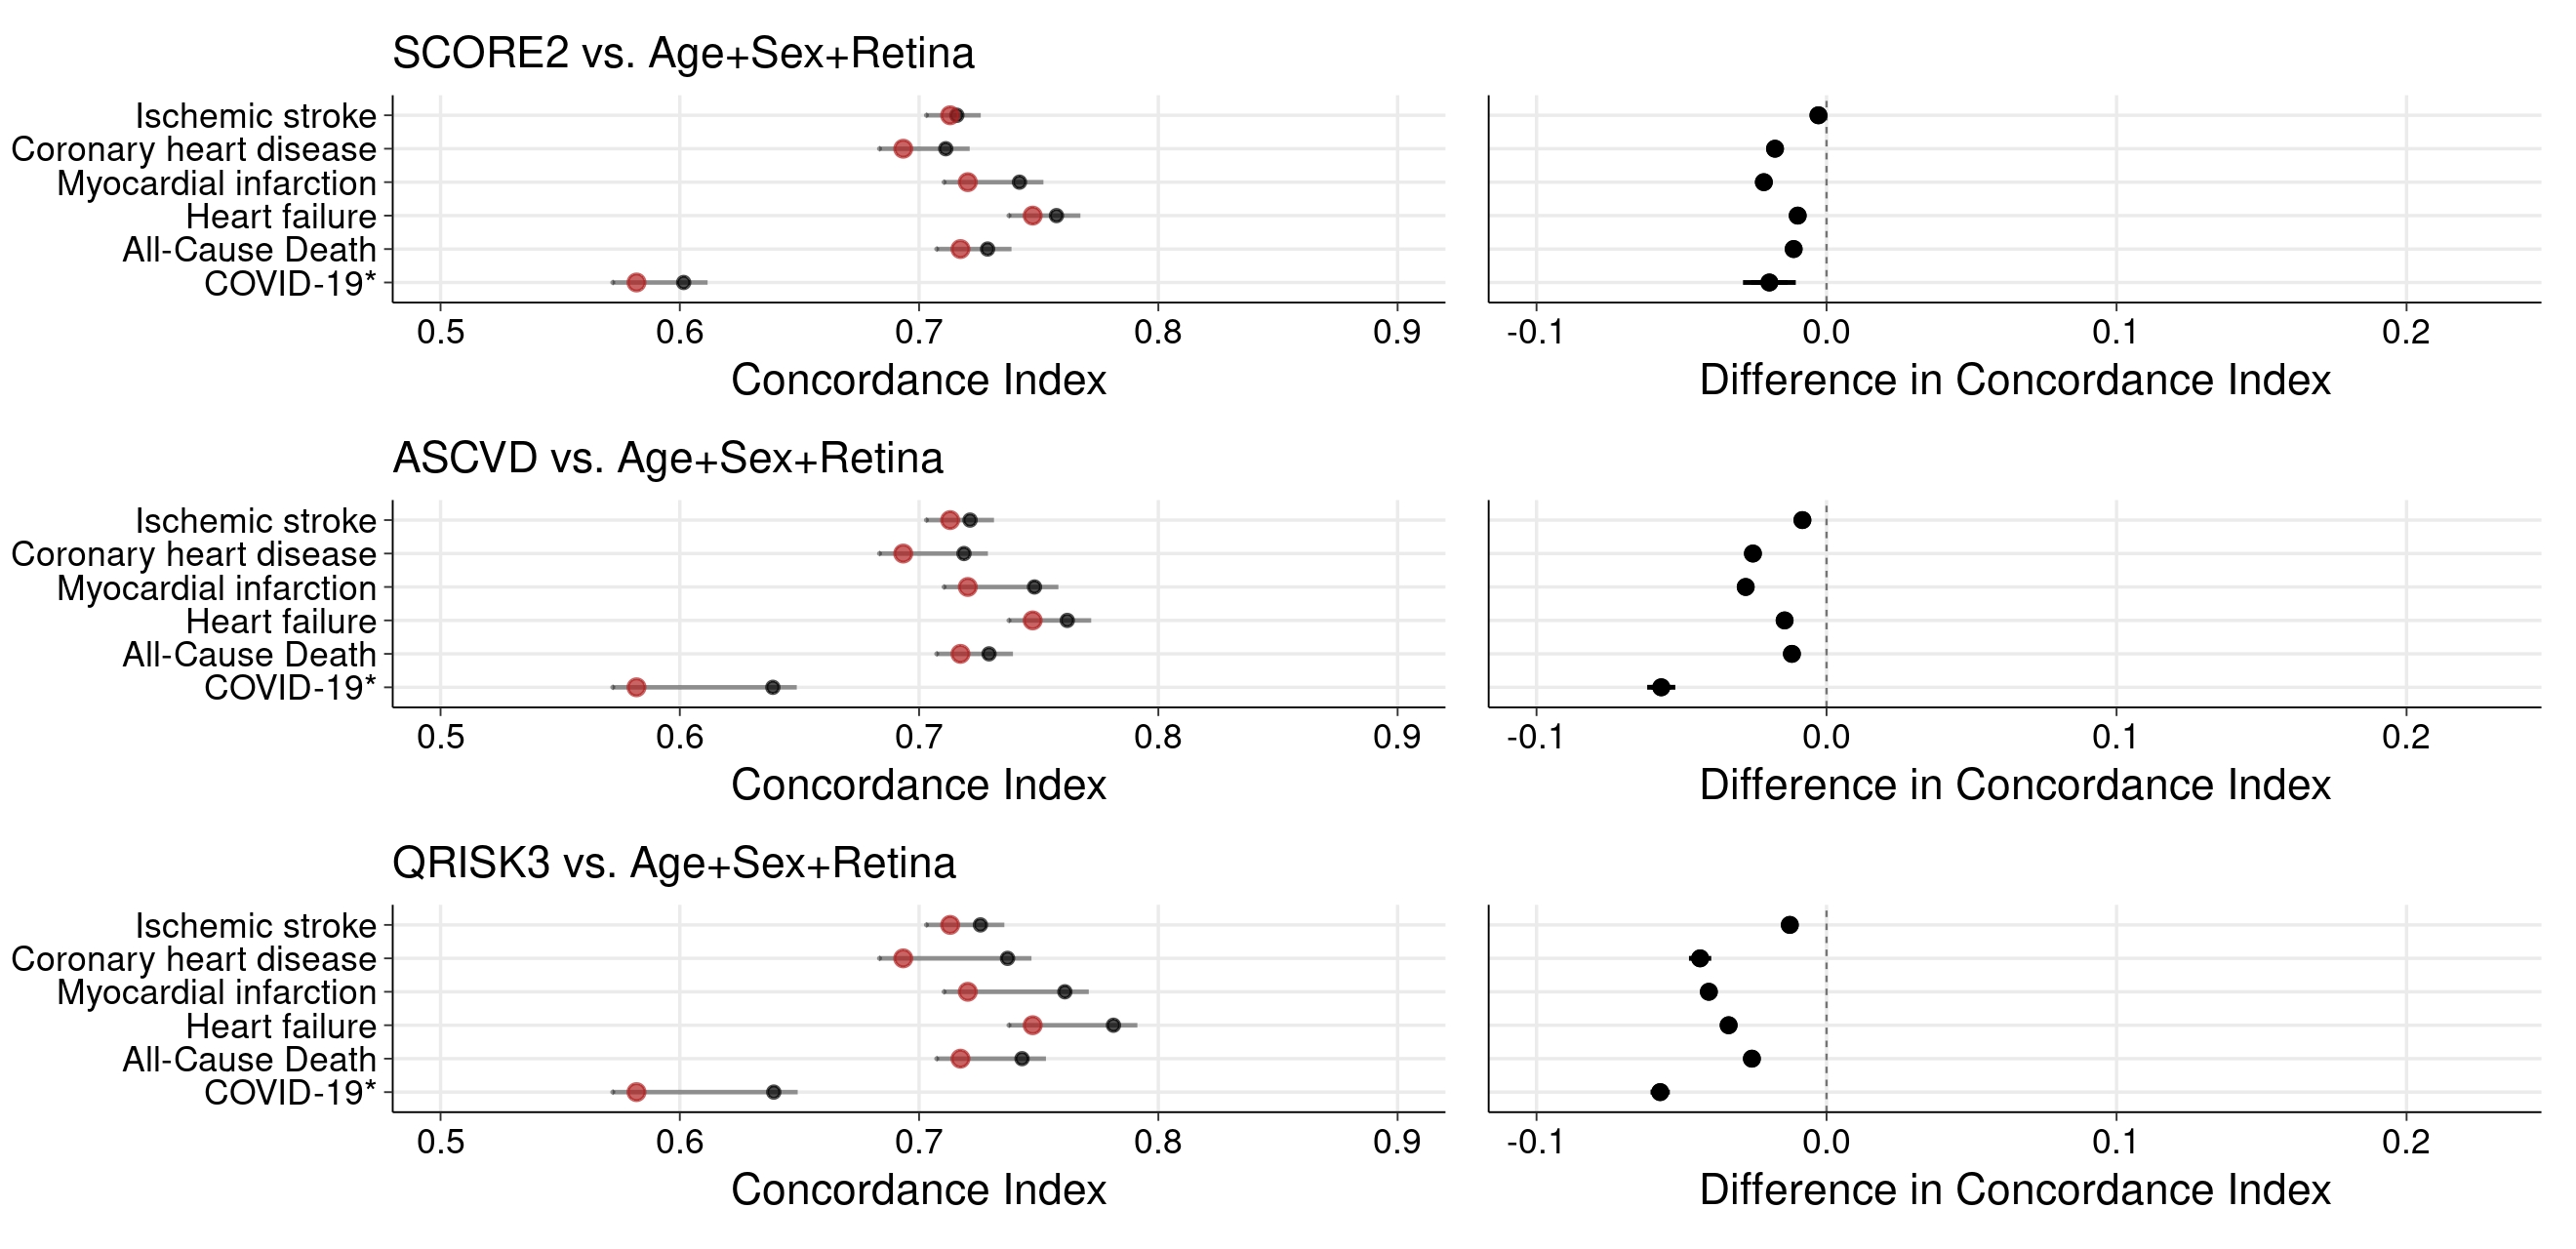

In [23]:
plot_width = 8.25; plot_height=4; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)


fig1 = plot_against_score("Age+Sex", "Age+Sex+Retina", endpoints_cardio) 
fig2 = plot_against_score("SCORE2", "Age+Sex+Retina", endpoints_cardio) 
fig3 = plot_against_score("ASCVD", "Age+Sex+Retina", endpoints_cardio)
fig4 = plot_against_score("QRISK3", "Age+Sex+Retina", endpoints_cardio) 


#fig1/fig2/fig3/fig4 
fig4b = fig2/fig3/fig4 
fig4b

In [24]:
plot_name = "FIGURE4B"
fig4b %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig4b %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

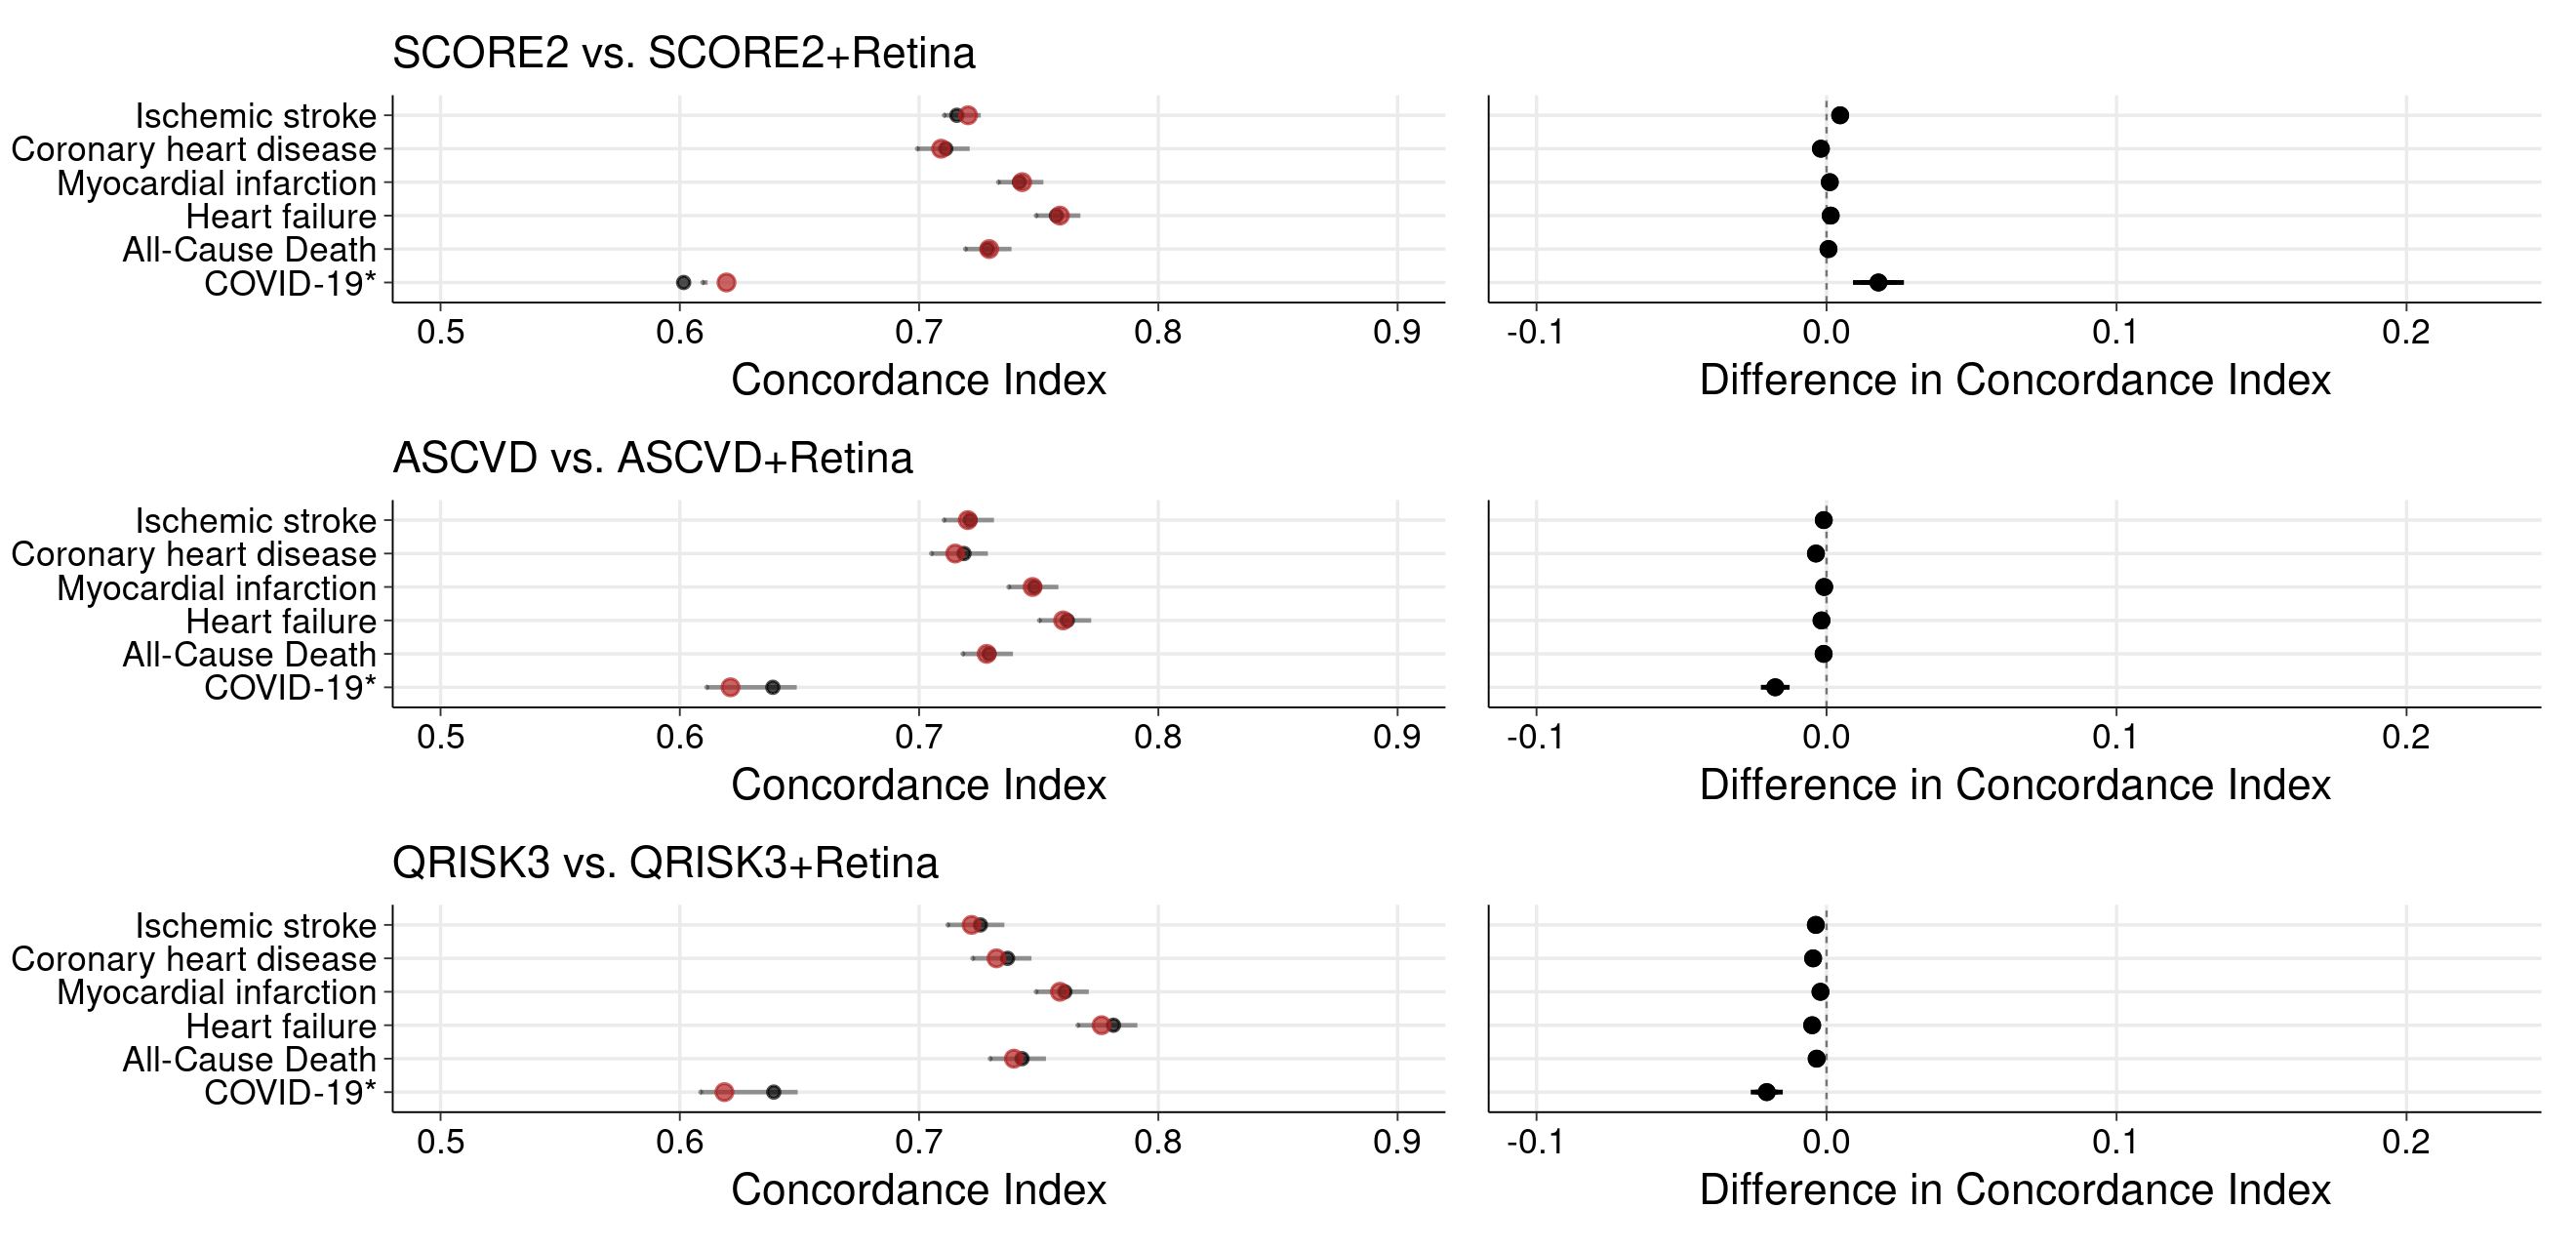

In [25]:
plot_width = 8.25; plot_height=4; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

# endpoints_cvd = c(
#     'phecode_404', #  "Ischemic heart disease",
#     'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
#     'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
#     'phecode_424', #  "Heart failure", # intervention
#     'phecode_420' #  "Cardiac arrest", # intervention
# )

fig2 = plot_against_score("SCORE2", "SCORE2+Retina", endpoints_cardio) 
fig3 = plot_against_score("ASCVD", "ASCVD+Retina", endpoints_cardio)
fig4 = plot_against_score("QRISK3", "QRISK3+Retina", endpoints_cardio) 

fig4a = fig2/fig3/fig4 
fig4a

In [26]:
plot_name = "FIGURE4A"
fig4a %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig4a %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

In [27]:
score1="Age+Sex"
score2="Age+Sex+Retina"

scores_plot = c(score1, score2)
temp_base = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))

score1="SCORE2"
score2="SCORE2+Retina"

scores_plot = c(score1, score2)
temp_score = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))

score1="ASCVD"
score2="ASCVD+Retina"

scores_plot = c(score1, score2)
temp_ascvd = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))

score1="QRISK3"
score2="QRISK3+Retina"

scores_plot = c(score1, score2)
temp_qrisk = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))


score1="ASCVD"
score2="Age+Sex+Retina"

scores_plot = c(score1, score2)
temp_retascvd = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))


score1="SCORE2"
score2="Age+Sex+Retina"

scores_plot = c(score1, score2)
temp_retscore = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))

score1="QRISK3"
score2="Age+Sex+Retina"

scores_plot = c(score1, score2)
temp_retqrisk= benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    #ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = !!sym(score2)-!!sym(score1)) %>%
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    select(endpoint, iteration, phecode_string, phecode_category, sex, score1, score2, delta) %>%
    pivot_longer(all_of(c(score1, score2, "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>% 
    pivot_wider(names_from=type, values_from=cindex) %>%
    select(phecode_string, `.lower`, `.upper`, delta) %>% 
    drop_na() %>%
    mutate(score = glue("{score1} vs. {score2}"))

all = bind_rows(temp_base,
                temp_score, 
                temp_ascvd, 
                temp_qrisk,
                temp_retscore,
                temp_retascvd,
                temp_retqrisk
               ) %>% arrange(phecode_string)

#%>% filter(delta>0) %>% arrange(desc(`Age+Sex+Retina`))


#     mutate(endpoint = fct_reorder(endpoint, delta)) %>%
#     mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
#     mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%




#     group_by(endpoint, score, phecode_string, phecode_category) %>%
#     pivot_wider(names_from=score, values_from=cindex) %>% 
#     mutate(id = row_number()) %>%
#     mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#     pivot_longer(all_of(c("Age+Sex", "Age+Sex+Retina", "delta")), names_to="type", values_to="cindex") %>%
#     group_by(endpoint, phecode_string, phecode_category, type) %>%
#     median_qi(cindex) %>% 
# ungroup() %>%
  
#select(phecode_string, score1, `Age+Sex`, delta) #%>% filter(delta>0) %>% arrange(desc(`Age+Sex+Retina`))

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(score1)` instead of `score1` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(score2)` instead of `score2` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


In [28]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=500)
all %>% 
mutate_if(is.numeric, round, 3) %>%
write_csv("outputs/SupplTable_PerformanceDeltasCVD.csv")

In [29]:
all %>% 
mutate_if(is.numeric, round, 3)

phecode_string,.lower,.upper,delta,score
<chr>,<dbl>,<dbl>,<dbl>,<glue>
All-Cause Death,0.005,0.010,0.007,Age+Sex vs. Age+Sex+Retina
All-Cause Death,-0.001,0.002,0.001,SCORE2 vs. SCORE2+Retina
All-Cause Death,-0.003,0.001,-0.001,ASCVD vs. ASCVD+Retina
All-Cause Death,-0.005,-0.002,-0.003,QRISK3 vs. QRISK3+Retina
All-Cause Death,-0.012,-0.011,-0.011,SCORE2 vs. Age+Sex+Retina
All-Cause Death,-0.013,-0.011,-0.012,ASCVD vs. Age+Sex+Retina
All-Cause Death,-0.027,-0.024,-0.026,QRISK3 vs. Age+Sex+Retina
Cerebral infarction [Ischemic stroke],0.007,0.013,0.010,Age+Sex vs. Age+Sex+Retina
Cerebral infarction [Ischemic stroke],0.002,0.007,0.005,SCORE2 vs. SCORE2+Retina


In [30]:
endpoint_selection

[1] "phecode_202"    "phecode_404"    "phecode_404-1"  "phecode_431-11"
 [5] "phecode_424"    "OMOP_4306655"   "phecode_440-3"  "phecode_468"   
 [9] "phecode_059-1"  "phecode_474"    "phecode_542"    "phecode_583"   
[13] "phecode_328"    "phecode_164"    "phecode_726-1"  "phecode_103"   
[17] "phecode_101"    "phecode_665"    "phecode_705-1"  "phecode_371"   
[21] "phecode_374-3"  "phecode_374-42" "phecode_374-5"  "phecode_375-1" 
[25] "phecode_388"

In [31]:
temp %>% head() #ungroup() %>% filter(endpoint %in% endpoint_selection)

ERROR: Error in head(.): object 'temp' not found


In [ ]:
temp_abs = temp %>% group_by(endpoint) %>% summarise(delta=median(delta), m_score2=median(!!sym(score2)), m_score1=median(!!sym(score1))) %>% ungroup() 
#print(levels(temp_abs$endpoint))

temp_abs_segment = temp_abs %>% rowwise() %>% mutate(min_cindex = min(m_score1, m_score2), max_cindex=max(m_score1, m_score2)) %>% ungroup()# %>% filter(abs(min_cindex-max_cindex)>0.02) 